In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os

In [2]:
sys.path.insert(0, os.path.join(os.path.abspath('..'), 'dataset'))

In [3]:
sys.path

['/Users/thomasbreydo/Desktop/Programming/Projects/dataset',
 '/Users/thomasbreydo/Desktop/Programming/Projects/movie-recommender',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python38.zip',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/lib-dynload',
 '',
 '/Users/thomasbreydo/Library/Python/3.8/lib/python/site-packages',
 '/Users/thomasbreydo/Library/Python/3.8/lib/python/site-packages/bashfuscator-0.0.1-py3.8.egg',
 '/Users/thomasbreydo/Library/Python/3.8/lib/python/site-packages/argcomplete-1.11.1-py3.8.egg',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/extensions',
 '/Users/thomasbreydo/.ipython']

In [4]:
import dataset

ModuleNotFoundError: No module named 'dataset'

In [3]:
df = load.load_movies()

FileNotFoundError: make sure you download The Movie Dataset from Kaggle into ./movies/

In [189]:
bymovie = df[['movieId', 'rating', 'vote_count', 'imdb_id']].groupby('movieId', sort=False).mean()

In [190]:
bymovie.head()

,rating,vote_count
movieId,,
110,4.016057,246.0
147,3.595933,363.0
858,4.339811,630.0
1246,3.912803,858.0
1968,3.827553,133.0


In [30]:
nmovies = bymovie.shape[0]

In [53]:
over500votes = bymovie[bymovie['vote_count'] >= 500]
over1000votes = bymovie[bymovie['vote_count'] >= 1000]

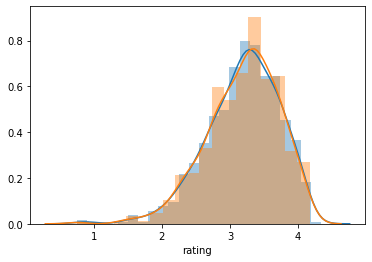

In [183]:
sns.distplot(over500votes['rating'], label=500)
sns.distplot(over1000votes['rating'], label=1000)

In [184]:
def restrict_ratings(ratings, low, high):
    '''Return `ratings` with just ratings in [low, high)'''
    return ratings[(ratings['rating'] <= high) & (ratings['rating'] > low)]

In [185]:
def collect_movies(ratings, unique_ranges, keep_top_n=50):
    movies = pd.DataFrame(columns=ratings.columns)
    for low_i, high_i in unique_ranges:
        best_in_this_range = restrict_ratings(ratings, low_i, high_i).sort_values('vote_count').iloc[-keep_top_n:]
        movies = pd.concat([movies, best_in_this_range])
    return movies

In [186]:
UNIQUE_RANGES = ((0, 0.5), (0.5, 1), (1, 1.5), (1.5, 2), (2, 2.5), (2.5, 3), (3, 3.5), (3.5, 5))

In [188]:
collect_movies(over1000votes, UNIQUE_RANGES).to_csv('movies_for_user_to_rate.csv', index=False)